In [1]:
import scanpy as sc

sc_data = sc.read_h5ad('/mnt/c/Users/ouyangkang/Desktop/convert_sc_data.h5ad')

In [2]:
sc.settings.verbosity = 3
sc.logging.print_versions()

-----
anndata     0.9.1
scanpy      1.9.3
-----
PIL                 10.0.0
asttokens           NA
backcall            0.2.0
colorama            0.4.6
comm                0.1.3
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.7
decorator           5.1.1
executing           1.2.0
h5py                3.9.0
igraph              0.10.6
importlib_resources NA
ipykernel           6.24.0
jedi                0.18.2
joblib              1.3.0
kiwisolver          1.4.4
leidenalg           0.10.0
llvmlite            0.40.1
louvain             0.8.0
matplotlib          3.7.1
mpl_toolkits        NA
natsort             8.4.0
numba               0.57.1
numpy               1.24.4
packaging           23.1
pandas              2.0.3
parso               0.8.3
pexpect             4.8.0
pickleshare         0.7.5
pkg_resources       NA
prompt_toolkit      3.0.39
psutil              5.9.5
ptyprocess          0.7.0
pure_eval           0.2.2
pydev_ipython       NA

In [34]:
# find highly differential gene

sc.pp.neighbors(sc_data, n_neighbors=10)

# sc.tl.leiden(sc_data)
# sc.tl.rank_genes_groups(sc_data, 'leiden', method='t-test')
# sc.pl.rank_genes_groups(sc_data, n_genes=25, sharey=False)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:39)


In [35]:
sc.tl.leiden(sc_data)

running Leiden clustering
    finished: found 53 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:01:58)


In [36]:
sc.tl.rank_genes_groups(sc_data, 'leiden', method='t-test')

ranking genes


/home/ouyangkang/software/anaconda3/envs/scRNA/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/ouyangkang/software/anaconda3/envs/scRNA/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/ouyangkang/software/anaconda3/envs/scRNA/lib/python3.8/site-packages/scanpy/tools/_

    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:17:14)


/home/ouyangkang/software/anaconda3/envs/scRNA/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/ouyangkang/software/anaconda3/envs/scRNA/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/ouyangkang/software/anaconda3/envs/scRNA/lib/python3.8/site-packages/scanpy/tools/_

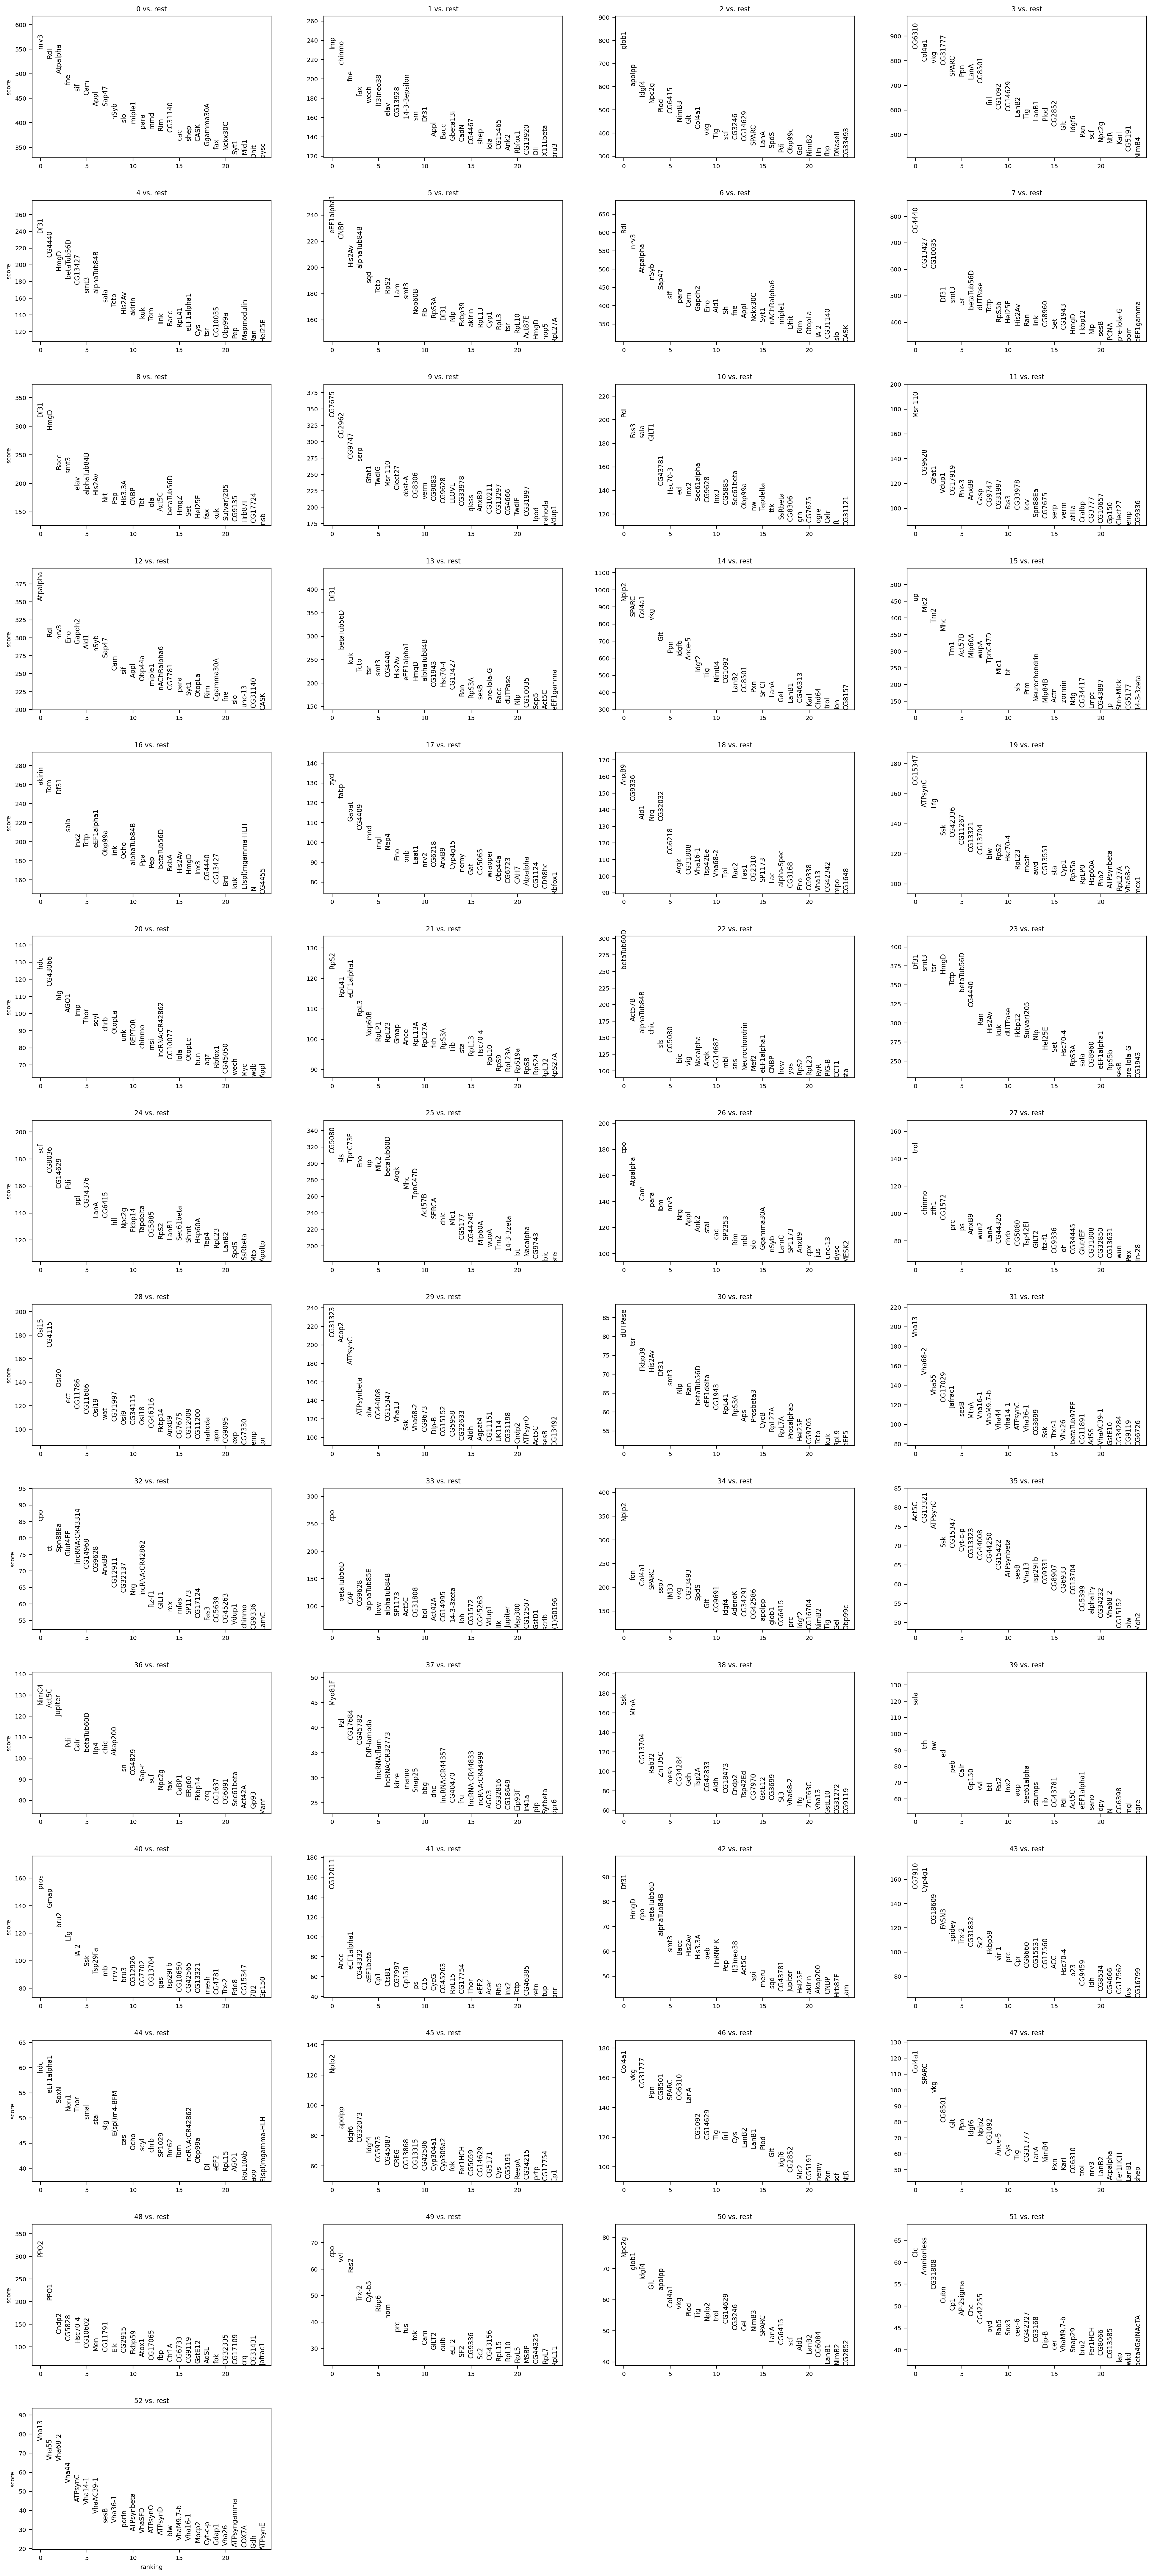

In [37]:
sc.pl.rank_genes_groups(sc_data, n_genes=25, sharey=False)

In [49]:
import pandas as pd

def rank_genes_groups_df(adata, key='rank_genes_groups',subgroup = None):
        dd = []
        groupby = adata.uns[key]['params']['groupby']
        if subgroup != None:
            cate = subgroup
        else:
            cate = adata.obs[groupby].cat.categories
        #print(cate)
        for group in cate:
            cols = []
            # inner loop to make data frame by concatenating the columns per group
            for col in adata.uns[key].keys():
                if col != 'params':
                       cols.append(pd.DataFrame(adata.uns[key][col][str(group)], columns=[col]))
            df = pd.concat(cols,axis=1)
            df['group'] = group
            dd.append(df)
        # concatenate the individual group data frames into one long data frame
        rgg = pd.concat(dd)
        rgg['group'] = rgg['group'].astype('category')
        return rgg

def get_top(df,num):
    top = []
    for i in df['group'].unique().tolist():
        ddf = df[df['group']==i].head(int(num))
        top.append(ddf)
    gene_df = pd.concat(top)
    return gene_df

In [65]:
genes = get_top(rank_genes_groups_df(sc_data), 100).names.tolist()

In [63]:
len(genes)

100

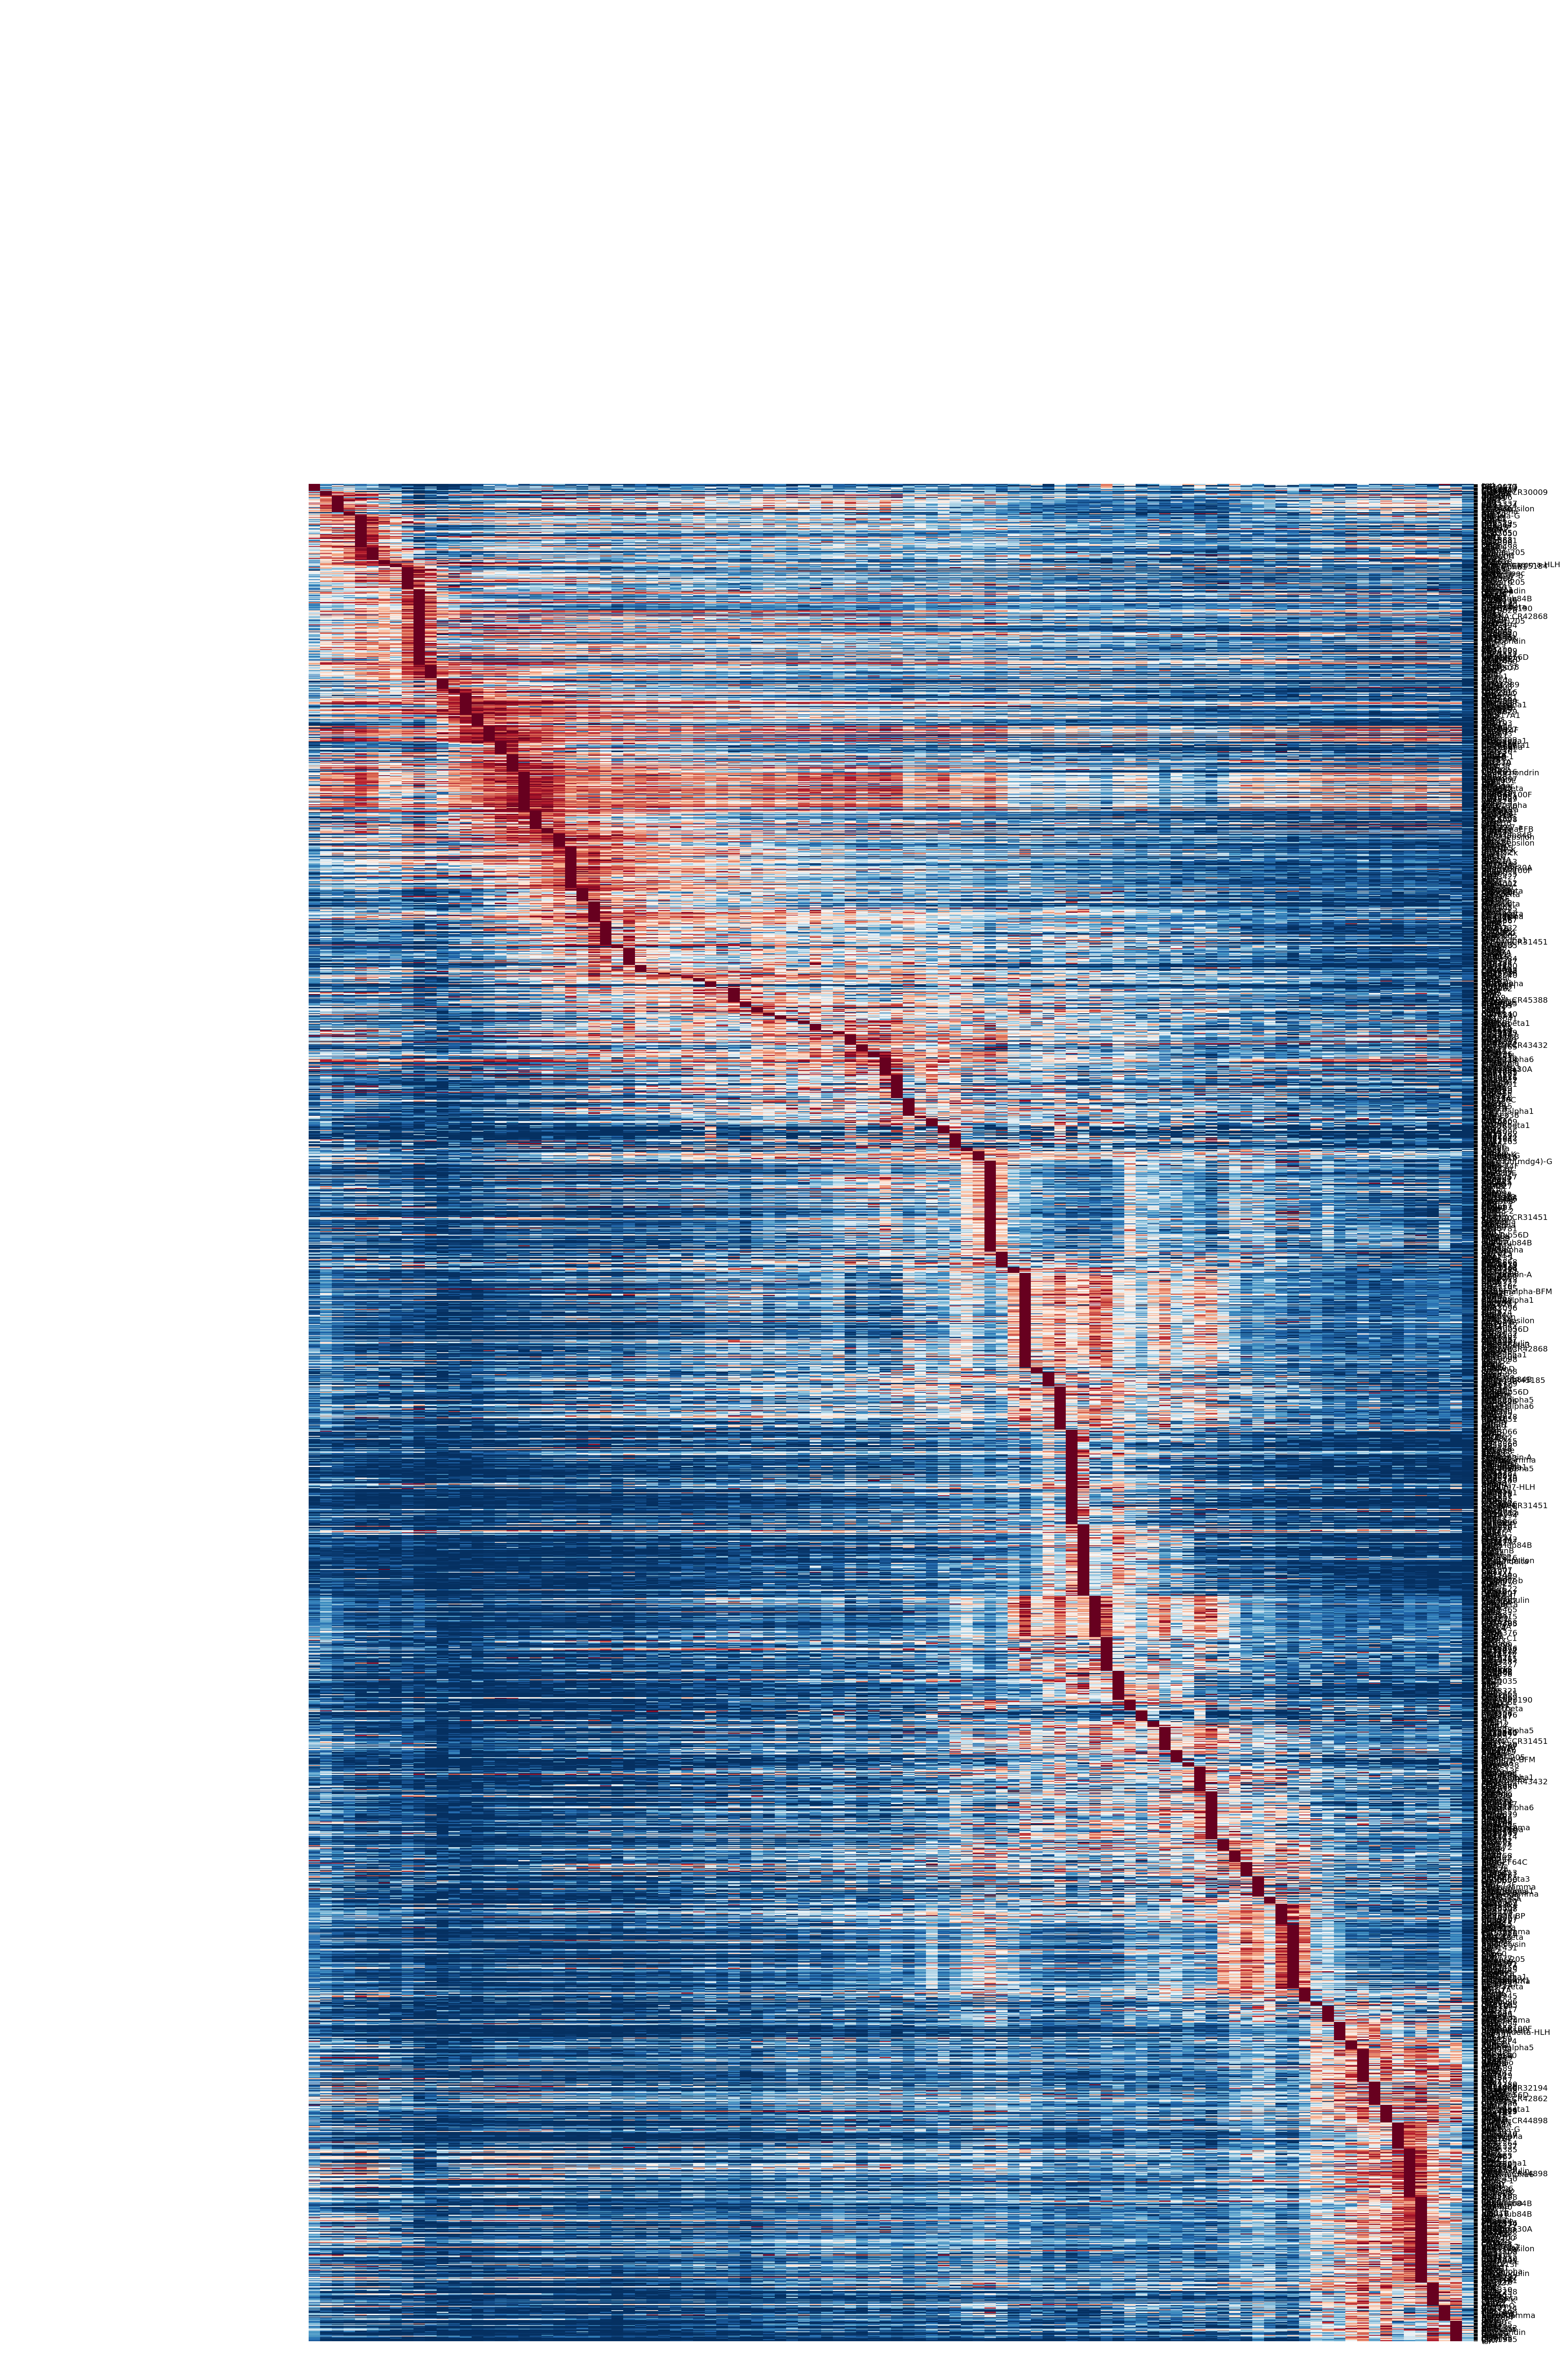

In [66]:
# get matrix 
import dynamo as dyn

dyn.pl.kinetic_heatmap(
    sc_data,
    genes = genes,
    basis ='umap',
    mode = 'pseudotime',
    tkey = 'infer_age',
    gene_order_method = 'maximum',
    color_map  = 'RdBu_r',
    show_colorbar =False,
    #dist_threshold  = 3e-10,
    #spaced_num =200,
    figsize =(20,30),
    #enforce =True
)

In [67]:
sc_data.uns['kinetics_heatmap']

0         1         2         3         4         5         6   \
cpo      1.000000  0.190012  0.086668  0.221235  0.126225  0.251040  0.043795   
tutl     1.000000  0.075398  0.438126  0.019754  0.078221  0.108393  0.000000   
CG10077  1.000000  0.374637  0.699559  0.593967  0.315924  0.408013  0.267157   
TpnC47D  1.000000  0.219047  0.202912  0.161344  0.212488  0.353333  0.021280   
His2Av   1.000000  0.162076  0.382869  0.542333  0.319391  0.277681  0.310916   
...           ...       ...       ...       ...       ...       ...       ...   
CG9743   0.158774  0.048059  0.130545  0.141371  0.147681  0.104739  0.098492   
geminin  0.146356  0.026825  0.007122  0.016582  0.000000  0.013816  0.000000   
CG31915  0.132145  0.007165  0.015681  0.000000  0.000000  0.000000  0.000000   
Cht7     0.130972  0.001779  0.000000  0.000000  0.000000  0.000000  0.000000   
tsr      0.080935  0.007871  0.000000  0.000000  0.005599  0.006975  0.007660   

               7         8         9   ...        90        91        92  \
cpo      0.057349  0.000000  0.000000  ...  0.446882  0.044881  0.000000   
tutl     0.034242  0.011897  0.000000  ...  0.153743  0.293301  0.164976   
CG10077  0.044338  0.181083  0.000000  ...  0.130385  0.312943  0.161843   
TpnC47D  0.073079  0.123659  0.066732  ...  0.283014  0.193187  0.342816   
His2Av   0.173631  0.000000  0.021161  ...  0.361253  0.356427  0.290757   
...           ...       ...       ...  ...       ...       ...       ...   
CG9743   0.030586  0.010207  0.014293  ...  0.881380  0.478604  0.451214   
geminin  0.079239  0.007570  0.000000  ...  0.738502  0.262545  0.777792   
CG31915  0.000000  0.000000  0.025169  ...  0.646419  0.323165  0.694985   
Cht7     0.000000  0.010958  0.000000  ...  0.812020  0.173410  0.528059   
tsr      0.000000  0.000000  0.010048  ...  0.734187  0.248243  0.871391   

               93        94        95        96        97        98        99  
cpo      0.106571  0.242904  0.000979  0.035224  0.981671  0.000000  0.000000  
tutl     0.687806  0.068317  0.269227  0.006636  0.023219  0.000000  0.295478  
CG10077  0.039413  0.556689  0.096672  0.006474  0.476287  0.179218  0.246138  
TpnC47D  0.313183  0.035261  0.197818  0.154253  0.432253  0.279907  0.069599  
His2Av   0.162755  0.261033  0.301922  0.176816  0.580714  0.686522  0.067514  
...           ...       ...       ...       ...       ...       ...       ...  
CG9743   0.260726  0.397220  0.364497  0.773572  0.690245  1.000000  0.272773  
geminin  0.384155  0.403356  0.421745  0.807627  0.691024  1.000000  0.201621  
CG31915  0.257706  0.417807  0.464684  0.916705  0.402788  1.000000  0.320186  
Cht7     0.427066  0.410314  0.282666  0.859286  0.491099  1.000000  0.320813  
tsr      0.146891  0.201548  0.249502  0.907780  0.632106  1.000000  0.311504  

[2105 rows x 100 columns]

In [70]:
sc_data

AnnData object with n_obs × n_vars = 238242 × 16725
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'cell', 'pANN', 'library', 'RNA_snn_res.0.5', 'seurat_clusters', 'collected_time', 'infer_age', 'infer_age_int', 'tissue_old', 'sub_cluster_number', 'celltype', 'tissue_update', 'germ_layer', 'subtype', 'leiden'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'kinetics_heatmap', 'rank_genes_groups', 'neighbors', 'leiden'
    obsm: 'X_harmony', 'X_pca', 'X_scvi', 'X_umap'
    obsp: 'distances', 'connectivities'

In [29]:
sc_data.var

vst.mean  vst.variance  vst.variance.expected  \
index                                                             
CR11023           0.000970      0.001120               0.001645   
l(2)gl            2.492806     46.888941              53.704561   
Cda5              0.782100     22.361966               6.822692   
CG3625            2.976956     39.011134              75.284931   
CG3164            2.390725     36.034929              49.614756   
...                    ...           ...                    ...   
tRNA:Lys-TTT-1-1  0.000004      0.000004               0.000004   
CR43483           0.000004      0.000004               0.000004   
tRNA:Arg-TCG-2-3  0.000004      0.000004               0.000004   
CG34312           0.000000      0.000000               0.000000   
snoRNA:Or-CD11c   0.000008      0.000008               0.000009   

                  vst.variance.standardized  vst.variable  
index                                                      
CR11023                            0.680559         False  
l(2)gl                             0.873090         False  
Cda5                               3.277587          True  
CG3625                             0.518180         False  
CG3164                             0.726295         False  
...                                     ...           ...  
tRNA:Lys-TTT-1-1                   0.958984         False  
CR43483                            0.958984         False  
tRNA:Arg-TCG-2-3                   0.958984         False  
CG34312                            0.000000         False  
snoRNA:Or-CD11c                    0.957976         False  

[16725 rows x 5 columns]

/home/ouyangkang/software/anaconda3/envs/scRNA/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(
/home/ouyangkang/software/anaconda3/envs/scRNA/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(


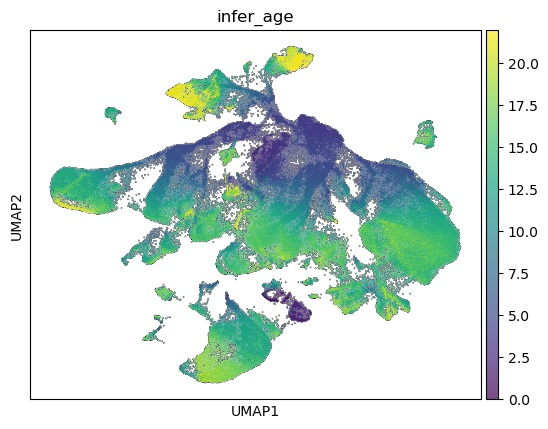

In [6]:
sc.pl.umap(sc_data, color=['infer_age'], legend_fontoutline=0.5, add_outline=True, legend_loc='on data', size=2, legend_fontsize=5)

In [19]:
# iamge formatting set
import seaborn as sns
import matplotlib as mp

cmap = sns.color_palette("ch:start=.2,rot=-.3", n_colors=1_000)
sns.set_context(context='paper')
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'lightgrey'})

In [30]:
obs_df = sc_data.obs.copy()
obs_df

orig.ident  nCount_RNA  nFeature_RNA  percent.mt  \
index                                                                 
CELL344_N2_1_1  V2R2209070002     10099.0          2392    1.089217   
CELL345_N1_1_1  V2R2209070002      3928.0          1049    0.712831   
CELL346_N3_1_1  V2R2209070002      7762.0          2243    0.979129   
CELL347_N2_1_1  V2R2209070002     21023.0          2147    0.756315   
CELL348_N1_1_1  V2R2209070002      2809.0           617    1.637593   
...                       ...         ...           ...         ...   
CELL8956_N1_6   V2R2206210025      1203.0           667    9.226933   
CELL8959_N1_6   V2R2206210025      1530.0           593    6.339869   
CELL8963_N1_6   V2R2206210025      4073.0          1373    9.059661   
CELL8982_N1_6   V2R2206210025      6262.0          1673    3.768764   
CELL9001_N1_6   V2R2206210025      2335.0           963    9.250535   

                          cell                 pANN        library  \
index                                                                
CELL344_N2_1_1  CELL344_N2_1_1    0.249983031290301  V2R2209070002   
CELL345_N1_1_1  CELL345_N1_1_1    0.249983031290301  V2R2209070002   
CELL346_N3_1_1  CELL346_N3_1_1    0.249983031290301  V2R2209070002   
CELL347_N2_1_1  CELL347_N2_1_1    0.249983031290301  V2R2209070002   
CELL348_N1_1_1  CELL348_N1_1_1    0.249983031290301  V2R2209070002   
...                        ...                  ...            ...   
CELL8956_N1_6    CELL8956_N1_6  0.00861680821003276  V2R2206210025   
CELL8959_N1_6    CELL8959_N1_6  0.00861680821003276  V2R2206210025   
CELL8963_N1_6    CELL8963_N1_6  0.00861680821003276  V2R2206210025   
CELL8982_N1_6    CELL8982_N1_6  0.00861680821003276  V2R2206210025   
CELL9001_N1_6    CELL9001_N1_6  0.00861680821003276  V2R2206210025   

                RNA_snn_res.0.5 seurat_clusters collected_time  infer_age  \
index                                                                       
CELL344_N2_1_1             13.0              13        E12-14h  12.634391   
CELL345_N1_1_1              4.0               4        E12-14h  12.707846   
CELL346_N3_1_1             24.0              24        E12-14h  14.176962   
CELL347_N2_1_1             10.0              10        E12-14h  16.564274   
CELL348_N1_1_1              4.0               4        E12-14h  12.707846   
...                         ...             ...            ...        ...   
CELL8956_N1_6               0.0               0         E8-10h  11.018364   
CELL8959_N1_6               3.0               3         E8-10h   6.904841   
CELL8963_N1_6               6.0               6         E8-10h   6.721202   
CELL8982_N1_6              27.0              27         E8-10h   2.130217   
CELL9001_N1_6               1.0               1         E8-10h   7.969950   

                infer_age_int           tissue_old sub_cluster_number  \
index                                                                   
CELL344_N2_1_1           13.0                  CNS                  5   
CELL345_N1_1_1           13.0            hemolymph                  2   
CELL346_N3_1_1           14.0               midgut                  2   
CELL347_N2_1_1           17.0            epidermis                  1   
CELL348_N1_1_1           13.0            hemolymph                  2   
...                       ...                  ...                ...   
CELL8956_N1_6            11.0                  CNS                  1   
CELL8959_N1_6             7.0                  CNS                  9   
CELL8963_N1_6             7.0             ectoderm                  2   
CELL8982_N1_6             2.0  cellular blastoderm                  0   
CELL9001_N1_6             8.0             fat body                  2   

                              celltype        tissue_update     germ_layer  \
index                                                                        
CELL344_N2_1_1                    glia                  CNS  neuroectoderm  

In [21]:
import numpy as np
seurat_clusters = np.unique(sc_data.obs['celltype'])
seurat_clusters

array(['AMP/EE progenitors', 'CNS primordium', 'Malpighian tubule',
       'Malpighian tubule anlage', 'Malpighian tubule primordium',
       'adult foregut precursors', 'adult hindgut precursors',
       'adult midgut progenitors', 'amnioserosa',
       'amnioserosa primordium', 'anal pad', 'apoptotic amnioserosa',
       'atrium', 'cardiogenic mesoderm', 'cellular blastoderm',
       'chordotonal organ', 'copper cells', 'corpora cardiaca',
       'corpus allata', 'crystal cells', 'developing fat body',
       'developing foregut', 'dorsal ectoderm', 'dorsal median cells',
       'dorsal trunk', 'dorsal vessel', 'dorsal vessel primordium',
       'early-developing fat body', 'ectoderm primordium',
       'ectoderm/mesoderm primordium', 'endoderm',
       'endoderm/mesoderm primordium', 'entero-endocrine cells',
       'enterocytes', 'epidermal epithelium', 'epidermis primordium',
       'epidermoblast/sensory primordium', 'esophagus',
       'esophagus primordium', 'fat body primordiu

## 1. try trajectory MT_lineage

In [58]:
sc.pp.neighbors(sc_data, n_neighbors=10)
sc.tl.diffmap(sc_data)

computing neighbors
    using 'X_pca' with n_pcs = 30


/home/ouyangkang/software/anaconda3/envs/scRNA/lib/python3.8/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:02:23)
computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:02)
    eigenvalues of transition matrix
    [1.         0.9991201  0.9990186  0.99896175 0.9987949  0.9987377
     0.998674   0.99838746 0.9980384  0.99765474 0.9974407  0.99735034
     0.9972614  0.99715346 0.9970724 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:06:16)


In [104]:
sc.tl.pca(sc_data, svd_solver='arpack')

computing PCA


    with n_comps=50
    finished (0:02:43)


In [105]:
# try trajectory MT_lineage
train = np.in1d(sc_data.obs['celltype'], ['Malpighian tubule anlage', 'Malpighian tubule primordium', 'Malpighian tubule'])
print(train)
try_data = sc_data[train]

[False False False ... False False False]


/home/ouyangkang/software/anaconda3/envs/scRNA/lib/python3.8/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/home/ouyangkang/software/anaconda3/envs/scRNA/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/ouyangkang/software/anaconda3/envs/scRNA/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/ouyangkang/software/anaconda3/envs/scRNA/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


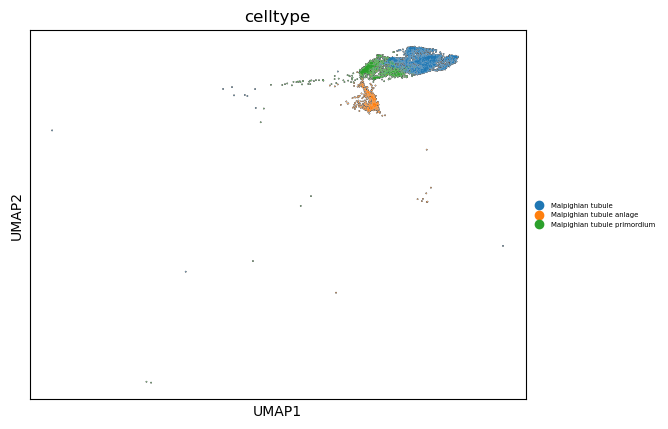

In [106]:
sc.pl.umap(try_data, color=['celltype'], legend_fontoutline=0.5, add_outline=True, legend_loc='right margin', size=2, legend_fontsize=5)

/home/ouyangkang/software/anaconda3/envs/scRNA/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(
/home/ouyangkang/software/anaconda3/envs/scRNA/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(


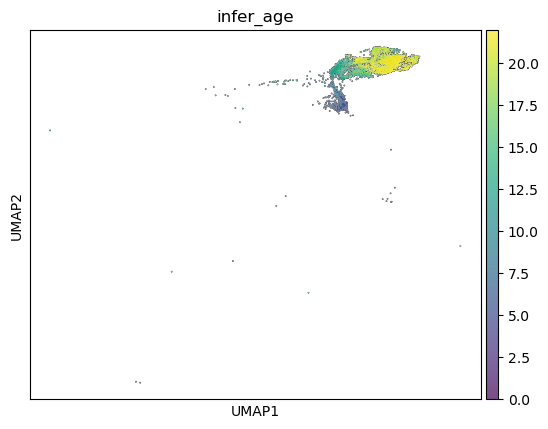

In [107]:
sc.pl.umap(try_data, color=['infer_age'], legend_fontoutline=0.5, add_outline=True, legend_loc='right margin', size=2, legend_fontsize=5)

In [108]:
sc.tl.leiden(try_data)

running Leiden clustering


    finished: found 59 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)


In [109]:
sc.tl.paga(try_data)

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:02)


In [113]:
sc.tl.paga(try_data, groups='leiden')

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:03)


In [118]:
# modify its size for better show trajectory
try_data.uns['leiden_sizes'] = [1] * len(try_data.uns['leiden_sizes'])

--> added 'pos', the PAGA positions (adata.uns['paga'])


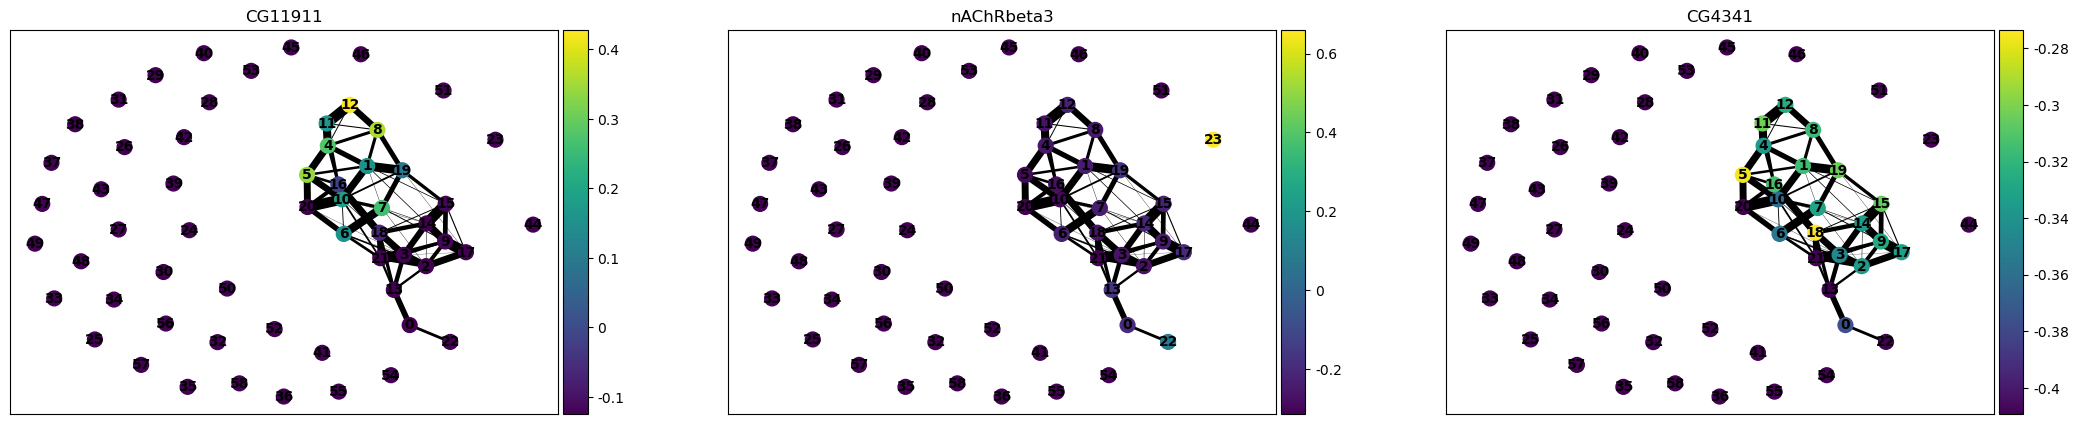

In [119]:
sc.pl.paga(try_data, colors=['CG11911', 'nAChRbeta3', 'CG4341'])

In [102]:
try_data.var_names

Index(['IA-2', 'CG11911', 'nAChRbeta3', 'CG4341', 'CG43349', 'CG5080', 'NLaz',
       'CG13946', 'CG13947', 'Npc2a',
       ...
       'CG11585', 'CG10597', 'CG12506', 'CG15155', 'CG32188', 'CG11854',
       'SNCF', 'CG42779', 'lncRNA:CR46076', 'CG42583'],
      dtype='object', name='index', length=999)